In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('wwii_politicians_dissimilarity.csv', index_col=0)
df

,Hitler,Mussolini,Churchill,Eisenhower,Stalin,Attlee,Franco,De_Gaulle,Mao_Tse,Truman,Chamberlain,Tito
Politician,,,,,,,,,,,,
Hitler,0,5,11,15,8,17,5,10,16,17,12,16
Mussolini,5,0,14,16,13,18,3,11,18,18,14,17
Churchill,11,14,0,7,11,11,12,5,16,8,10,8
Eisenhower,15,16,7,0,16,16,14,8,17,6,7,12
Stalin,8,13,11,16,0,15,13,11,12,14,16,12
Attlee,17,18,11,16,15,0,16,12,16,12,9,13
Franco,5,3,12,14,13,16,0,9,17,16,10,12
De_Gaulle,10,11,5,8,11,12,9,0,13,9,11,7
Mao_Tse,16,18,16,17,12,16,17,13,0,12,17,10


In [3]:
distance_matrix = df.values
distance_matrix

array([[ 0,  5, 11, 15,  8, 17,  5, 10, 16, 17, 12, 16],
       [ 5,  0, 14, 16, 13, 18,  3, 11, 18, 18, 14, 17],
       [11, 14,  0,  7, 11, 11, 12,  5, 16,  8, 10,  8],
       [15, 16,  7,  0, 16, 16, 14,  8, 17,  6,  7, 12],
       [ 8, 13, 11, 16,  0, 15, 13, 11, 12, 14, 16, 12],
       [17, 18, 11, 16, 15,  0, 16, 12, 16, 12,  9, 13],
       [ 5,  3, 12, 14, 13, 16,  0,  9, 17, 16, 10, 12],
       [10, 11,  5,  8, 11, 12,  9,  0, 13,  9, 11,  7],
       [16, 18, 16, 17, 12, 16, 17, 13,  0, 12, 17, 10],
       [17, 18,  8,  6, 14, 12, 16,  9, 12,  0,  9, 11],
       [12, 14, 10,  7, 16,  9, 10, 11, 17,  9,  0, 15],
       [16, 17,  8, 12, 12, 13, 12,  7, 10, 11, 15,  0]])

In [4]:
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
positions = mds.fit_transform(distance_matrix)

In [5]:
mds_results = pd.DataFrame(positions, 
                          index=df.index, 
                          columns=['Dimension 1', 'Dimension 2'])
mds_results

,Dimension 1,Dimension 2
Politician,,
Hitler,8.456274,2.278292
Mussolini,10.843789,-0.692751
Churchill,-2.085066,-1.962687
Eisenhower,-2.807598,-8.156923
Stalin,3.651738,8.128422
Attlee,-10.963555,-0.284193
Franco,8.032692,-1.705265
De_Gaulle,0.030121,0.137088
Mao_Tse,-4.689717,11.041273


C:\Users\alasm\AppData\Local\Temp\ipykernel_7748\1490681503.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (mds_results['Dimension 1'][i], mds_results['Dimension 2'][i]))


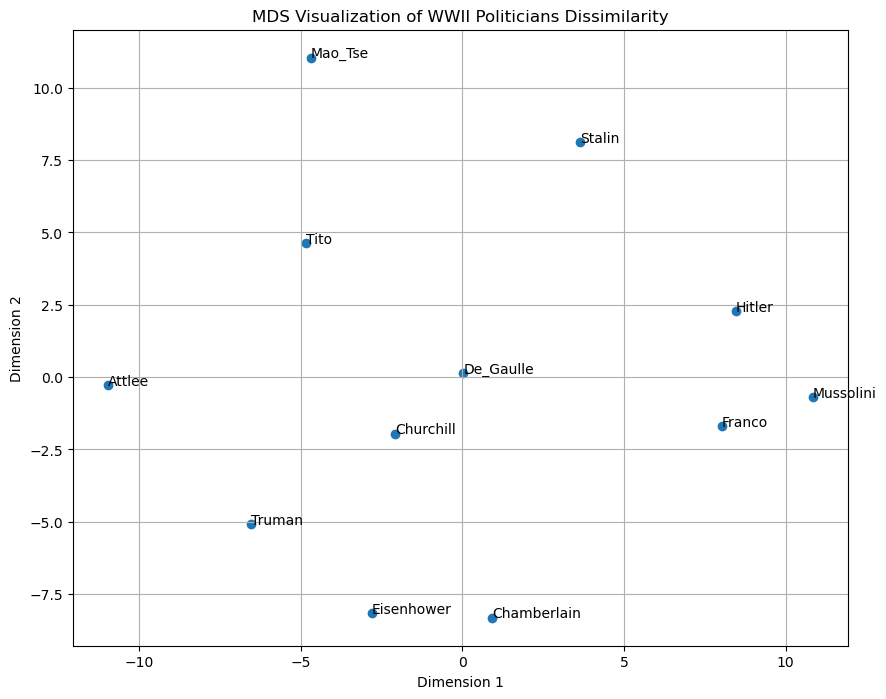

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(mds_results['Dimension 1'], mds_results['Dimension 2'])


for i, politician in enumerate(mds_results.index):
    plt.annotate(politician, 
                 (mds_results['Dimension 1'][i], mds_results['Dimension 2'][i]))

plt.title('MDS Visualization of WWII Politicians Dissimilarity')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()